# KNN no `chb14_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb14_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.702128,0.510638,0.787234,0.808511,0.638298,0.808511,0.893617,0.829787,0.574468,0.872340,0.893617,0.872340,0.744681,0.787234,0.872340,0.808511,0.851064,0.851064
1,0.808511,0.680851,0.808511,0.957447,0.680851,0.851064,0.936170,0.851064,0.659574,0.957447,0.936170,0.851064,0.765957,0.680851,0.872340,0.936170,0.936170,0.936170
2,0.808511,0.595745,0.723404,0.787234,0.574468,0.765957,0.787234,0.765957,0.468085,0.872340,0.723404,0.872340,0.659574,0.638298,0.872340,0.851064,0.787234,0.765957
3,0.765957,0.595745,0.808511,0.829787,0.638298,0.893617,0.893617,0.872340,0.553191,0.893617,0.936170,0.914894,0.659574,0.617021,0.893617,0.829787,0.872340,0.914894
4,0.787234,0.510638,0.808511,0.872340,0.595745,0.851064,0.851064,0.893617,0.659574,0.893617,0.914894,0.808511,0.744681,0.744681,0.851064,0.829787,0.808511,0.893617
5,0.702128,0.574468,0.808511,0.829787,0.489362,0.765957,0.808511,0.765957,0.595745,0.893617,0.851064,0.829787,0.680851,0.659574,0.765957,0.808511,0.787234,0.787234
6,0.787234,0.553191,0.765957,0.851064,0.638298,0.851064,0.829787,0.829787,0.595745,0.829787,0.893617,0.893617,0.638298,0.659574,0.829787,0.851064,0.851064,0.872340
7,0.851064,0.617021,0.808511,0.893617,0.617021,0.872340,0.872340,0.893617,0.617021,0.914894,0.914894,0.893617,0.744681,0.638298,0.893617,0.851064,0.851064,0.893617
8,0.872340,0.553191,0.765957,0.787234,0.638298,0.893617,0.914894,0.893617,0.659574,0.936170,0.872340,0.851064,0.702128,0.765957,0.957447,0.872340,0.914894,0.914894
9,0.829787,0.574468,0.723404,0.872340,0.702128,0.702128,0.851064,0.936170,0.617021,0.893617,0.893617,0.851064,0.638298,0.638298,0.893617,0.893617,0.851064,0.872340


,count,mean,std,min,25%,50%,75%,max
9,20.0,0.872340,0.052572,0.744681,0.845745,0.882979,0.898936,0.957447
17,20.0,0.869149,0.044349,0.765957,0.845745,0.872340,0.898936,0.936170
11,20.0,0.864894,0.040414,0.765957,0.851064,0.872340,0.893617,0.957447
10,20.0,0.858511,0.057455,0.723404,0.840426,0.872340,0.893617,0.936170
14,20.0,0.852128,0.057538,0.702128,0.824468,0.872340,0.893617,0.957447
6,20.0,0.850000,0.041115,0.787234,0.829787,0.840426,0.877660,0.936170
16,20.0,0.850000,0.047060,0.765957,0.808511,0.851064,0.877660,0.936170
7,20.0,0.846809,0.056756,0.765957,0.824468,0.829787,0.893617,0.957447
15,20.0,0.836170,0.051704,0.702128,0.829787,0.840426,0.856383,0.936170
3,20.0,0.835106,0.043040,0.765957,0.808511,0.829787,0.851064,0.957447


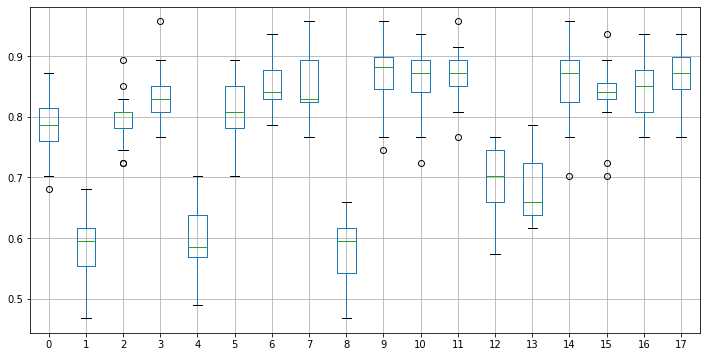

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '14'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.784043,0.054036,0.787234,14,0
1,0.582979,0.054091,0.595745,14,1
2,0.798936,0.040531,0.808511,14,2
3,0.835106,0.043040,0.829787,14,3
4,0.589362,0.057796,0.585106,14,4
5,0.817021,0.050914,0.808511,14,5
6,0.850000,0.041115,0.840426,14,6
7,0.846809,0.056756,0.829787,14,7
8,0.573404,0.065297,0.595745,14,8
9,0.872340,0.052572,0.882979,14,9
